In [1]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/20212/class/nghiep-vu/sales-optimization/data/KAG_conversion_data.csv")

In [2]:
# 1.) ad_id: 
# 2.) xyz_campaign_id: định danh 1 chiến dịch quảng cáo của 1 công ty mà ad đó thuộc về
# 3.) fb_campaign_id: định danh ad đó trên hệ thống của fb
# 4.) age: tuổi người được hiển thị quảng cáo
# 5.) gender:  
# 6.) interest: id category quan tâm của user( được lấy ra từ profile)
# 7.) Impressions: số lần hiển thị quảng cáo
# 8.) Clicks: số lần user nhấn vô quảng cáo
# 9.) Spent: số tiền công ty phải trả cho fb, để hiển thị ad đó
# 10.) Total conversion: số người quan tâm tới sản phẩm sau khi xem ad
# 11.) Approved conversion: số người mua  sản phẩm sau khi xem ad

df.head()

,ad_id,xyz_campaign_id,fb_campaign_id,age,gender,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
0,708746,916,103916,30-34,M,15,7350,1,1.43,2,1
1,708749,916,103917,30-34,M,16,17861,2,1.82,2,0
2,708771,916,103920,30-34,M,20,693,0,0.00,1,0
3,708815,916,103928,30-34,M,28,4259,1,1.25,1,0
4,708818,916,103928,30-34,M,28,4133,1,1.29,1,1


# Thống kê data

In [3]:
# check null: không có trường nào có giá trị null
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ad_id                1143 non-null   int64  
 1   xyz_campaign_id      1143 non-null   int64  
 2   fb_campaign_id       1143 non-null   int64  
 3   age                  1143 non-null   object 
 4   gender               1143 non-null   object 
 5   interest             1143 non-null   int64  
 6   Impressions          1143 non-null   int64  
 7   Clicks               1143 non-null   int64  
 8   Spent                1143 non-null   float64
 9   Total_Conversion     1143 non-null   int64  
 10  Approved_Conversion  1143 non-null   int64  
dtypes: float64(1), int64(8), object(2)
memory usage: 98.4+ KB


In [4]:
# số lượng 1143 mẫu và 11 feature
df.shape

(1143, 11)

In [6]:
# phân bố một số trường
# Clicks: Maximum - 421, Minimum - 0
# Số tiền kiếm được mỗi quảng cáo: Maximum - 639, Minimum - 0
# tối đa 60 quan tâm 1 quảng cáo
# tối đa 21 người mua 1 mặt hàng sau khi xem quảng cáo
# trung bình 1 quảng cáo có 3 người quan tâm
df_des = df.iloc[:,3:]
df_des.describe()

,interest,Impressions,Clicks,Spent,Total_Conversion,Approved_Conversion
count,1143.000000,1.143000e+03,1143.000000,1143.000000,1143.000000,1143.000000
mean,32.766404,1.867321e+05,33.390201,51.360656,2.855643,0.944007
std,26.952131,3.127622e+05,56.892438,86.908418,4.483593,1.737708
min,2.000000,8.700000e+01,0.000000,0.000000,0.000000,0.000000
25%,16.000000,6.503500e+03,1.000000,1.480000,1.000000,0.000000
50%,25.000000,5.150900e+04,8.000000,12.370000,1.000000,1.000000
75%,31.000000,2.217690e+05,37.500000,60.025000,3.000000,1.000000
max,114.000000,3.052003e+06,421.000000,639.949998,60.000000,21.000000


In [7]:
# các khoảng tuổi
print(df['age'].unique())

['30-34' '35-39' '40-44' '45-49']


In [27]:
# các chủ đề quan tâm 
df['interest'].unique()

array([ 15,  16,  20,  28,  29,  27,  31,   7,  30,  24,  21,  32,  18,
        63,  65,  25,  10,  19,  26,  36,  23,  64,  22,   2,  66, 100,
       101, 102, 103, 105, 107, 110, 111, 112, 113, 108, 109, 114, 104,
       106])

In [28]:
df['xyz_campaign_id'].unique()

array([ 916,  936, 1178])

# Tính theo campaign

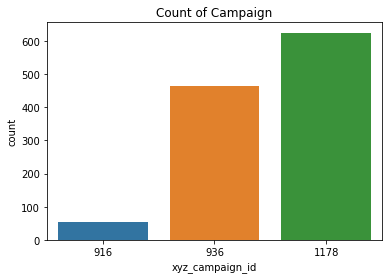

In [16]:
# số lượng ad mỗi campaign
import matplotlib.pyplot as plt
import seaborn as sns
sns.countplot(x="xyz_campaign_id",data = df).set_title("Count of Campaign")
plt.show()

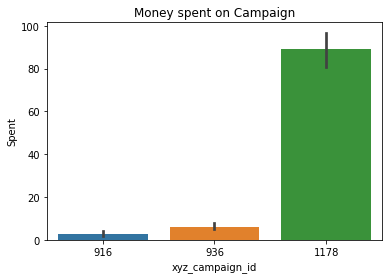

In [10]:
# tổng tiền mỗi campaign
sns.barplot(x="xyz_campaign_id",y= "Spent",data = df).set_title("Money spent on Campaign")
plt.show()
# 936 nhiều ad hơn nhưng ít tiền hơn(vì có những ad dc trả nhiều tiền hơn)

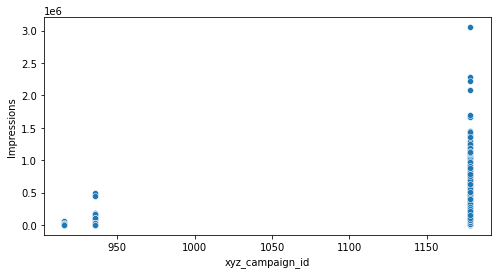

In [31]:
plt.figure(figsize=(8,4))
sns.scatterplot(x = 'xyz_campaign_id' ,y='Impressions', data=df)
# hoặc cách khác tăng tiền k chỉ là ad được trả nhiều tiên hơn hoặc cũng có thể 1178 hiển thị nhiều lần hơn cho 1 ad

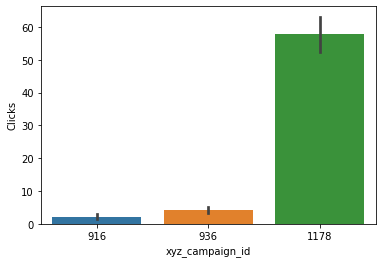

In [15]:
# click mỗi campaign
sns.barplot(x="xyz_campaign_id",y="Clicks", data = df)
# tỉ lệ click 1178 cx cao nhất (có thể do impression nhiều nhất)

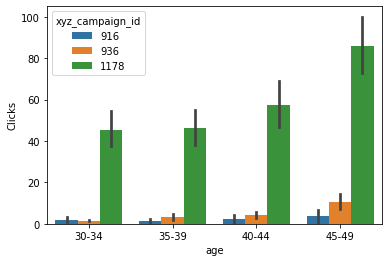

In [17]:
# click theo tuối mỗi campaign 
sns.barplot(x="age",y="Clicks", data = df, hue = "xyz_campaign_id")
# tuổi càng cao click nhiều hơn

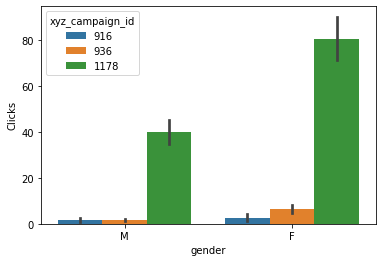

In [18]:
# click theo giới tính mỗi campain
sns.barplot(x="gender",y="Clicks", data = df, hue = "xyz_campaign_id")
# nữ click nhiều hơn

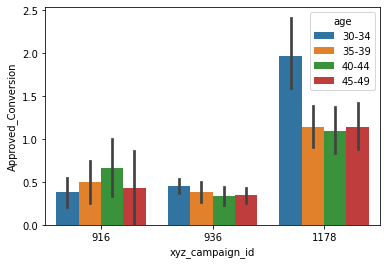

In [19]:
# tỉ lệ chuyển đổi thành mua hàng mỗi campaign
sns.barplot(x="xyz_campaign_id", y = "Approved_Conversion", hue= "age", data = df)
# 1178 tốt cho độ tuổi 30-34, 916 tốt cho 40-44,..
# tỉ lệ chuyển đổi 1178 cao nhất 

# Tính theo giới tính

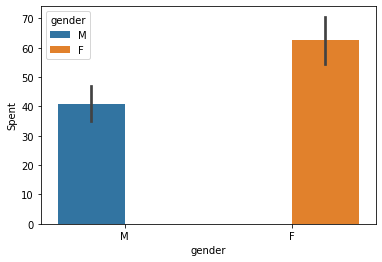

In [25]:
sns.barplot(x="gender", y="Spent", hue= "gender",data = df)   
# giành nhiều tiền quảng cáo hơn cho nữ

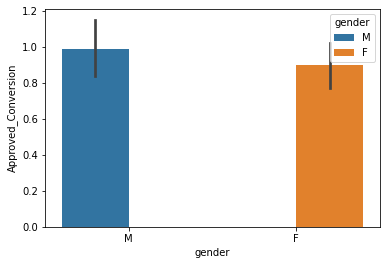

In [24]:
sns.barplot(x="gender", y = "Approved_Conversion", hue= "gender", data = df)
# tuy nhiên tỉ lệ chuyển đổi thành đơn hàng có vẻ bị ít hơn một xíu

# So sánh campaign với facebook

# Tính theo sở thích

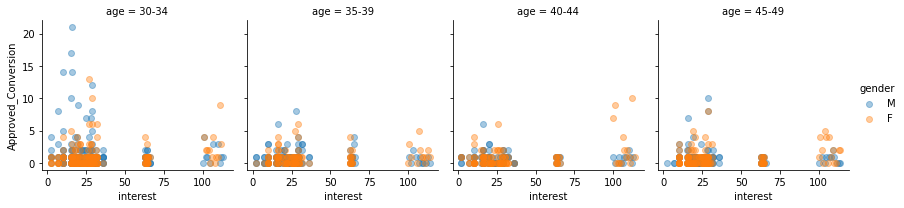

In [32]:
g = sns.FacetGrid(df, col="age", hue="gender")
g.map(plt.scatter, "interest", "Approved_Conversion", alpha=.4)
g.add_legend()
# sở thích 0-35 hay mua hàng nhất 
# đặc biệt là nam có sở thích 0-35, độ tuổi 30-34 hay mua nhất
# tuổi 30-34 hay mua nhất 

# Hiệp phương sai 

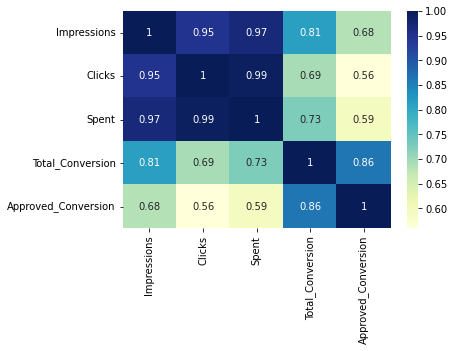

In [26]:
sns.heatmap(df[["Impressions","Clicks","Spent","Total_Conversion","Approved_Conversion"]].corr(),annot=True,cmap="YlGnBu")
# tỉ lệ thuận (hợp lí)

# 